In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['Pump_it_Up_Data_Mining_the_Water_Table_-_Training_set_values.csv', 'Pump_it_Up_Data_Mining_the_Water_Table_-_Test_set_values.csv', 'Pump_it_Up_Data_Mining_the_Water_Table_-_Training_set_labels.csv', 'Pump_it_Up_Data_Mining_the_Water_Table_-_Submission_format.csv']


In [3]:
submission=pd.read_csv('../input/Pump_it_Up_Data_Mining_the_Water_Table_-_Submission_format.csv')

In [4]:
submission.head()

,id,status_group
0,50785,predicted label
1,51630,predicted label
2,17168,predicted label
3,45559,predicted label
4,49871,predicted label


In [5]:
test=pd.read_csv('../input/Pump_it_Up_Data_Mining_the_Water_Table_-_Test_set_values.csv')

In [6]:
test.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [7]:
test.shape

(14850, 40)

In [8]:
train_set=pd.read_csv('../input/Pump_it_Up_Data_Mining_the_Water_Table_-_Training_set_labels.csv')

In [9]:
train_set.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [10]:
train_set.shape

(59400, 2)

In [11]:
train=pd.read_csv('../input/Pump_it_Up_Data_Mining_the_Water_Table_-_Training_set_values.csv')

In [12]:
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [13]:
train.shape

(59400, 40)

In [14]:
import matplotlib.pyplot as plt

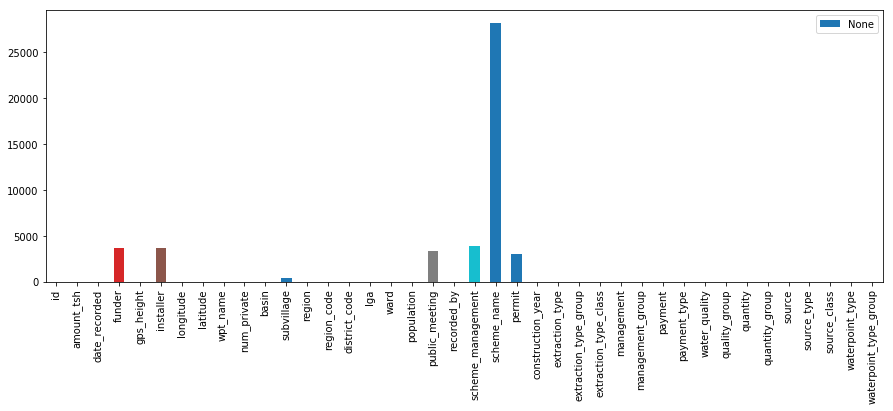

In [21]:
missing=train.isnull().sum()
missing.plot(kind='bar', figsize=(15,5))
plt.legend()

In [23]:
train.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

In [27]:
pd.to_datetime(train['date_recorded'], errors='coerce')

0       2011-03-14
1       2013-03-06
2       2013-02-25
3       2013-01-28
4       2011-07-13
5       2011-03-13
6       2012-10-01
7       2012-10-09
8       2012-11-03
9       2011-08-03
10      2011-02-20
11      2013-02-18
12      2012-10-14
13      2013-03-15
14      2012-10-20
15      2011-08-04
16      2011-07-04
17      2011-09-04
18      2011-07-22
19      2011-02-22
20      2011-02-27
21      2013-02-10
22      2011-10-04
23      2013-11-03
24      2013-01-21
25      2013-02-25
26      2013-01-16
27      2011-07-11
28      2013-03-05
29      2013-03-16
           ...    
59370   2013-01-29
59371   2012-10-09
59372   2012-10-31
59373   2013-01-30
59374   2012-10-29
59375   2011-08-03
59376   2013-02-03
59377   2012-10-23
59378   2011-03-21
59379   2011-07-13
59380   2011-03-14
59381   2011-03-16
59382   2013-08-03
59383   2013-01-19
59384   2011-07-10
59385   2012-11-03
59386   2011-08-22
59387   2013-03-12
59388   2013-01-29
59389   2011-08-06
59390   2011-08-04
59391   2013

In [28]:
train.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

In [32]:
train.fillna(train.mean(),inplace=True)

In [33]:
train.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting               0
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                       0
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [34]:
df=pd.merge(train, train_set)

In [35]:
df.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

In [40]:
df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [41]:
df.drop('date_recorded', axis=1, inplace=True)

In [42]:
df.drop('construction_year', axis=1, inplace=True)

In [43]:
df.columns

Index(['id', 'amount_tsh', 'funder', 'gps_height', 'installer', 'longitude',
       'latitude', 'wpt_name', 'num_private', 'basin', 'subvillage', 'region',
       'region_code', 'district_code', 'lga', 'ward', 'population',
       'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name',
       'permit', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group', 'status_group'],
      dtype='object')

In [73]:
df['funder']=pd.factorize(df['funder'])[0]
df['installer']=pd.factorize(df['installer'])[0]
df['wpt_name']=pd.factorize(df['wpt_name'])[0]
df['subvillage']=pd.factorize(df['subvillage'])[0]
df['region']=pd.factorize(df['region'])[0]
df['lga']=pd.factorize(df['lga'])[0]
df['public_meeting']=pd.factorize(df['public_meeting'])[0]
df['public_meeting']=pd.factorize(df['public_meeting'])[0]
df['recorded_by']=pd.factorize(df['public_meeting'])[0]


In [76]:
df.dtypes

id                         int64
amount_tsh               float64
funder                     int64
gps_height                 int64
installer                  int64
longitude                float64
latitude                 float64
wpt_name                   int64
num_private                int64
basin                     object
subvillage                 int64
region                     int64
region_code                int64
district_code              int64
lga                        int64
ward                      object
population                 int64
public_meeting             int64
recorded_by                int64
scheme_management         object
scheme_name               object
permit                    object
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_type              object
water_quality             object
quality_gr

In [77]:
df.columns

Index(['id', 'amount_tsh', 'funder', 'gps_height', 'installer', 'longitude',
       'latitude', 'wpt_name', 'num_private', 'basin', 'subvillage', 'region',
       'region_code', 'district_code', 'lga', 'ward', 'population',
       'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name',
       'permit', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group', 'status_group'],
      dtype='object')

In [78]:
ff=['scheme_management', 'scheme_name',
       'permit', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group', 'status_group']

In [88]:
df['scheme_management']=pd.factorize(df['scheme_management'])[0]
df['scheme_name']=pd.factorize(df['scheme_name'])[0]
df['permit']=pd.factorize(df['permit'])[0]
df['extraction_type']=pd.factorize(df['extraction_type'])[0]
df['management']=pd.factorize(df['management'])[0]
df['management_group']=pd.factorize(df['management_group'])[0]
df['payment']=pd.factorize(df['payment'])[0]
df['payment_type']=pd.factorize(df['payment_type'])[0]
df['water_quality']=pd.factorize(df['water_quality'])[0]
df['quality_group']=pd.factorize(df['quality_group'])[0]
df['quantity']=pd.factorize(df['quantity'])[0]
df['quantity_group']=pd.factorize(df['quantity_group'])[0]
df['source']=pd.factorize(df['source'])[0]
df['source_type']=pd.factorize(df['source_type'])[0]
df['source_class']=pd.factorize(df['source_class'])[0]
df['waterpoint_type']=pd.factorize(df['waterpoint_type'])[0]
df['waterpoint_type_group']=pd.factorize(df['waterpoint_type_group'])[0]
df['status_group']=pd.factorize(df['status_group'])[0]
df['extraction_type_group']=pd.factorize(df['extraction_type_group'])[0]
df['extraction_type_class']=pd.factorize(df['extraction_type_class'])[0]
df['basin']=pd.factorize(df['basin'])[0]
df['ward']=pd.factorize(df['ward'])[0]




In [90]:
X=df.drop('status_group', axis=1)

In [91]:
X.shape

(59400, 38)

In [92]:
y=df['status_group']

In [93]:
y.shape

(59400,)

In [94]:
from sklearn.ensemble import RandomForestClassifier

In [95]:
from sklearn.model_selection import train_test_split

In [97]:
X_train, y_train,X_test, y_test=train_test_split(X, y, random_state=0)

In [122]:
rfc=RandomForestClassifier()
rfc.fit(X_train, y_train)

ValueError: Unknown label type: 'continuous-multioutput'

In [117]:
X.columns

Index(['id', 'amount_tsh', 'funder', 'gps_height', 'installer', 'longitude',
       'latitude', 'wpt_name', 'num_private', 'basin', 'subvillage', 'region',
       'region_code', 'district_code', 'lga', 'ward', 'population',
       'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name',
       'permit', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

In [120]:
X.drop('longitude', axis=1, inplace=True)
X.drop('latitude', axis=1, inplace=True)

In [123]:
from sklearn.svm import SVC

In [124]:
clf=SVC()
clf.fit(X_train, y_train)

ValueError: bad input shape (14850, 38)

In [125]:
X, y = check_X_y(X, y, dtype=np.float64, order='C', accept_sparse='csr')

NameError: name 'check_X_y' is not defined